<a href="https://colab.research.google.com/github/fralfaro/MAT281_20XX/blob/main/docs/lectures/machine_learning/over_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overfitting II

Algunas de las técnicas que podemos utilizar para reducir el overfitting, son:

* Recolectar más datos.
* Introducir una penalización a la complejidad con alguna técnica de regularización.
* Utilizar modelos ensamblados.
* Utilizar validación cruzada.
* Optimizar los parámetros del modelo con *grid search*.
* Reducir la dimensión de los datos.
* Aplicar técnicas de selección de atributos.


Veremos ejemplos de algunos métodos para reducir el sobreajuste (overfitting).

## Validación cruzada

La **validación cruzada** se inicia mediante el fraccionamiento de un conjunto de datos en un número $k$ de particiones (generalmente entre 5 y 10) llamadas *pliegues*.

La validación cruzada luego itera entre los datos de *evaluación* y *entrenamiento* $k$ veces, de un modo particular. En cada iteración de la validación cruzada, un *pliegue* diferente se elige como los datos de *evaluación*. En esta iteración, los otros *pliegues* $k-1$ se combinan para formar los datos de *entrenamiento*. Por lo tanto, en cada iteración tenemos $(k-1) / k$ de los datos utilizados para el *entrenamiento* y $1 / k$ utilizado para la *evaluación*.

Cada iteración produce un modelo, y por lo tanto una estimación del rendimiento de la *generalización*, por ejemplo, una estimación de la precisión. Una vez finalizada la validación cruzada, todos los ejemplos se han utilizado sólo una vez para *evaluar* pero $k -1$ veces para *entrenar*. En este punto tenemos estimaciones de rendimiento de todos los *pliegues* y podemos calcular la media y la desviación estándar de la precisión del modelo. 


<img src="https://drive.google.com/uc?export=view&id=1cfbifdzLMEaXPniCUkIKunHxG_cP40nO" width = "400" align="center"/>



Veamos un ejemplo en python, ocupando el conjunto de datos **make_classification**.

In [1]:
# librerias 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
import random

random.seed(1982) # semilla

# graficos incrustados
%matplotlib inline

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (12, 4)})

In [2]:
# Ejemplo en python - árboles de decisión
# dummy data con 100 atributos y 2 clases
X, y = make_classification(10000, 100, n_informative=3, n_classes=2,
                          random_state=1982)

# separ los datos en train y eval
x_train, x_eval, y_train, y_eval = train_test_split(X, y, test_size=0.35, 
                                                    train_size=0.65,
                                                    random_state=1982)

# Grafico de ajuste del árbol de decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(2, 20))

In [3]:
# Ejemplo cross-validation
from sklearn.model_selection import cross_validate,StratifiedKFold

# creando pliegues

skf = StratifiedKFold(n_splits=20)
precision = []
model =  DecisionTreeClassifier(criterion='entropy', max_depth=5)

skf.get_n_splits(x_train, y_train)
for k, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train,y_train) 
    score = model.score(X_test,y_test)
    precision.append(score)
    print('Pliegue: {0:}, Dist Clase: {1:}, Prec: {2:.3f}'.format(k+1,
                        np.bincount(y_train), score))
    

Pliegue: 1, Dist Clase: [4763 4737], Prec: 0.928
Pliegue: 2, Dist Clase: [4763 4737], Prec: 0.914
Pliegue: 3, Dist Clase: [4763 4737], Prec: 0.916
Pliegue: 4, Dist Clase: [4763 4737], Prec: 0.938
Pliegue: 5, Dist Clase: [4763 4737], Prec: 0.924
Pliegue: 6, Dist Clase: [4763 4737], Prec: 0.938
Pliegue: 7, Dist Clase: [4763 4737], Prec: 0.924
Pliegue: 8, Dist Clase: [4762 4738], Prec: 0.938
Pliegue: 9, Dist Clase: [4762 4738], Prec: 0.936
Pliegue: 10, Dist Clase: [4762 4738], Prec: 0.908
Pliegue: 11, Dist Clase: [4762 4738], Prec: 0.936
Pliegue: 12, Dist Clase: [4762 4738], Prec: 0.938
Pliegue: 13, Dist Clase: [4762 4738], Prec: 0.934
Pliegue: 14, Dist Clase: [4762 4738], Prec: 0.922
Pliegue: 15, Dist Clase: [4762 4738], Prec: 0.930
Pliegue: 16, Dist Clase: [4762 4738], Prec: 0.928
Pliegue: 17, Dist Clase: [4762 4738], Prec: 0.924
Pliegue: 18, Dist Clase: [4762 4738], Prec: 0.926
Pliegue: 19, Dist Clase: [4762 4738], Prec: 0.936
Pliegue: 20, Dist Clase: [4762 4738], Prec: 0.920


En este ejemplo, utilizamos el iterador `StratifiedKFold` que nos proporciona Scikit-learn. Este iterador es una versión mejorada de la validación cruzada, ya que cada *pliegue* va a estar estratificado para mantener las proporciones entre las *clases* del conjunto de datos original, lo que suele dar mejores estimaciones del sesgo y la varianza del modelo. 

También podríamos utilizar `cross_val_score` que ya nos proporciona los resultados de la precisión que tuvo el modelo en cada *pliegue*.

In [4]:
# Ejemplo con cross_val_score
from sklearn.model_selection import cross_val_score

# separ los datos en train y eval
x_train, x_eval, y_train, y_eval = train_test_split(X, y, test_size=0.35, 
                                                    train_size=0.65,
                                                    random_state=1982)


model = DecisionTreeClassifier(criterion='entropy',
                               max_depth=5)


precision = cross_val_score(estimator=model,
                            X=x_train,
                            y=y_train,
                            cv=20)

In [5]:
precision = [round(x,2) for x in precision]
print('Precisiones: {} '.format(precision))
print('Precision promedio: {0: .3f} +/- {1: .3f}'.format(np.mean(precision),
                                          np.std(precision)))

Precisiones: [0.93, 0.94, 0.92, 0.94, 0.93, 0.9, 0.92, 0.94, 0.94, 0.93, 0.94, 0.92, 0.91, 0.91, 0.93, 0.94, 0.93, 0.93, 0.92, 0.93] 
Precision promedio:  0.927 +/-  0.011


### Más datos y curvas de aprendizaje

* Muchas veces, reducir el Sobreajuste es tan fácil como conseguir más datos, dame más datos y te predeciré el futuro!. 
* En la vida real nunca es una tarea tan sencilla conseguir más datos. 
* Una técnica para reducir el sobreajuste son las *curvas de aprendizaje*, las cuales grafican la precisión en función del tamaño de los datos de entrenamiento. 

<img src="https://drive.google.com/uc?export=view&id=1dLS4rL9zQjQIkGqSEW-HiqlCRFB3t5_p" width = "500" align="center"/>




Para graficar las curvas de aprendizaje es necesario ocupar el comando de sklearn llamado `learning_curve`.

In [6]:
# Ejemplo Curvas de aprendizaje
from sklearn.model_selection import  learning_curve

train_sizes, train_scores, test_scores = learning_curve(
                        estimator=model,
                        X=x_train,
                        y=y_train, 
                        train_sizes=np.linspace(0.1, 1.0, 20),
                        cv=10,
                        n_jobs=-1
                        )

# calculo de metricas
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

Veamos que el comando `learning_curve` va creando conjunto de datos, pero de distintos tamaños.

In [7]:
# tamano conjunto de entrenamiento
for k in range(len(train_sizes)):
    print('Tamaño Conjunto {}: {}'.format(k+1,train_sizes[k]))

Tamaño Conjunto 1: 585
Tamaño Conjunto 2: 862
Tamaño Conjunto 3: 1139
Tamaño Conjunto 4: 1416
Tamaño Conjunto 5: 1693
Tamaño Conjunto 6: 1970
Tamaño Conjunto 7: 2247
Tamaño Conjunto 8: 2524
Tamaño Conjunto 9: 2801
Tamaño Conjunto 10: 3078
Tamaño Conjunto 11: 3356
Tamaño Conjunto 12: 3633
Tamaño Conjunto 13: 3910
Tamaño Conjunto 14: 4187
Tamaño Conjunto 15: 4464
Tamaño Conjunto 16: 4741
Tamaño Conjunto 17: 5018
Tamaño Conjunto 18: 5295
Tamaño Conjunto 19: 5572
Tamaño Conjunto 20: 5850


Finalmente, graficamos las precisiones tanto para el conjunto de entranamiento como de evaluación para los distintos conjuntos de datos generados. 

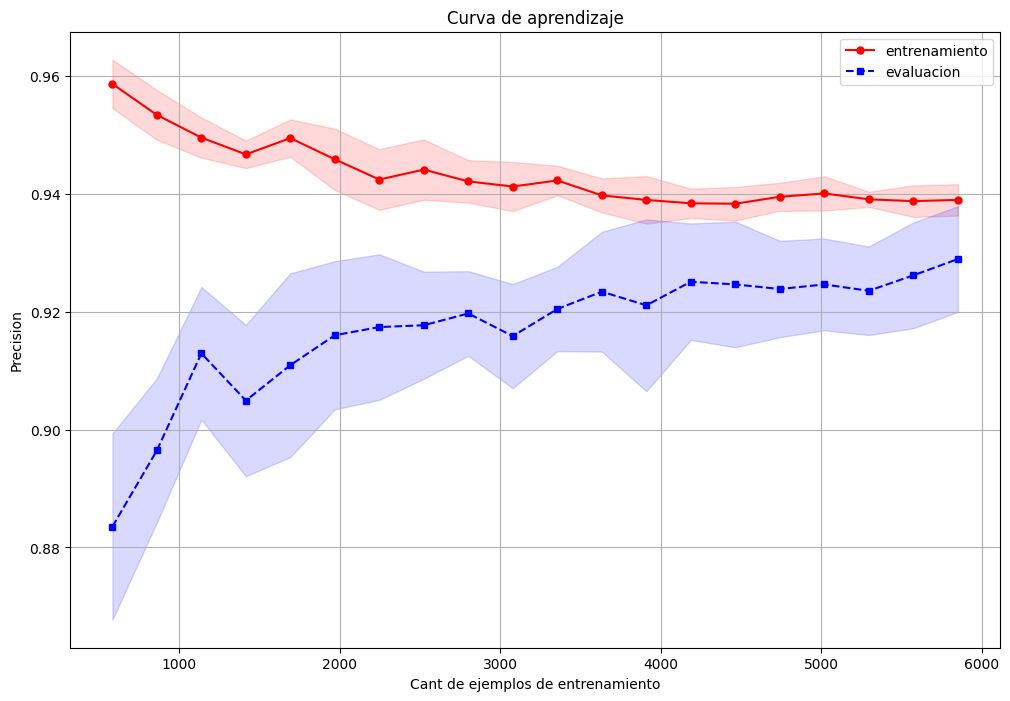

In [8]:
# graficando las curvas
plt.figure(figsize=(12,8))

plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='entrenamiento')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='evaluacion')
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.title('Curva de aprendizaje')
plt.legend(loc='upper right')
plt.xlabel('Cant de ejemplos de entrenamiento')
plt.ylabel('Precision')
plt.show()

En este gráfico podemos concluir que:

* Con pocos datos la precisión entre los datos de entrenamiento y los de evaluación son muy distintas y luego a medida que la cantidad de datos va aumentando, el modelo puede generalizar mucho mejor y las precisiones se comienzan a emparejar. 


* Este gráfico también puede ser importante a la hora de decidir invertir en la obtención de más datos, ya que por ejemplo nos indica que a partir las 2500 muestras, el modelo ya no gana mucha más precisión a pesar de obtener más datos.

## Optimización de parámetros con Grid Search

La mayoría de los modelos de Machine Learning cuentan con varios parámetros para ajustar su comportamiento, por lo tanto, otra alternativa que tenemos para reducir el Sobreajuste es optimizar estos parámetros por medio de un proceso conocido como **grid search** e intentar encontrar la combinación ideal que nos proporcione mayor precisión.

El enfoque que utiliza *grid search* es bastante simple, se trata de una búsqueda exhaustiva por el paradigma de fuerza bruta en el que se especifica una lista de valores para diferentes parámetros, y la computadora evalúa el rendimiento del modelo para cada combinación de éstos parámetros para obtener el conjunto óptimo que nos brinda el mayor rendimiento. 


<img src="https://drive.google.com/uc?export=view&id=1LuDGH3PORyDrvG9sO24TKvyM-23NlRDH" width = "600" align="center"/>




In [9]:
# Ejemplo de grid search con SVM.
from sklearn.model_selection import GridSearchCV

# creación del modelo
model = DecisionTreeClassifier()

# rango de parametros
rango_criterion = ['gini','entropy']
rango_max_depth =np.array( [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150])
param_grid = dict(criterion=rango_criterion, max_depth=rango_max_depth)
param_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': array([  4,   5,   6,   7,   8,   9,  10,  11,  12,  15,  20,  30,  40,
         50,  70,  90, 120, 150])}

In [10]:
# aplicar greed search

gs = GridSearchCV(estimator=model, 
                  param_grid=param_grid, 
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)

gs = gs.fit(x_train, y_train)

In [11]:
# imprimir resultados
print(gs.best_score_)
print(gs.best_params_)

0.9332307692307692
{'criterion': 'entropy', 'max_depth': 6}


In [12]:
# utilizando el mejor modelo
mejor_modelo = gs.best_estimator_
mejor_modelo.fit(x_train, y_train)
print('Precisión: {0:.3f}'.format(mejor_modelo.score(x_eval, y_eval)))

Precisión: 0.939


En este ejemplo, primero utilizamos el objeto `GridSearchCV` que nos permite realizar *grid search* junto con validación cruzada, luego comenzamos a ajustar el modelo con las diferentes combinaciones de los valores de los parámetros `criterion` y `max_depth`. Finalmente imprimimos el mejor resultado de precisión y los valores de los parámetros que utilizamos para obtenerlos; por último utilizamos este mejor modelo para realizar las predicciones con los datos de *evaluación*. 

Podemos ver que la precisión que obtuvimos con los datos de evaluación es casi idéntica a la que nos indicó *grid search*, lo que indica que el modelo *generaliza* muy bien.


## Reducción de dimensionalidad

La **reducción de dimensiones** es frecuentemente usada como una etapa de preproceso en el entrenamiento de
sistemas, y consiste en escoger un subconjunto de
variables, de tal manera, que el espacio de características
quede óptimamente reducido de acuerdo a un criterio de
evaluación, cuyo fin es distinguir el subconjunto que
representa mejor el espacio inicial de entrenamiento.

Como cada característica que se incluye en el análisis,
puede incrementar el costo y el tiempo de proceso de los
sistemas, hay una fuerte motivación para diseñar e
implementar sistemas con pequeños conjuntos de
características. Sin dejar de lado, que al mismo tiempo,
hay una opuesta necesidad de incluir un conjunto
suficiente de características para lograr un alto
rendimiento. 


La reducción de dimensionalidad se puede separar en dos tipos: **Extracción de atributos** y  **Selección de aributos**.

### Extracción de atributos

La **extracción de atributos** comienza a partir de un conjunto inicial de datos medidos y crea valores derivados (características) destinados a ser informativos y no redundantes, lo que facilita los pasos de aprendizaje y generalización posteriores, y en algunos casos conduce a a mejores interpretaciones humanas. 

Cuando los datos de entrada a un algoritmo son demasiado grandes para ser procesados y se sospecha que son redundantes (por ejemplo, la misma medición en pies y metros, o la repetitividad de las imágenes presentadas como píxeles), entonces se puede transformar en un conjunto reducido de características (también denominado un vector de características). 


Estos algoritmos fueron analizados con profundidad en la sección de **Análisis no supervisados - Reducción de la dimensionalidad**.

### Selección de atributos

Proceso por el cual seleccionamos un subconjunto de atributos (representados por cada una de las columnas en un datasetde forma tabular) que son más relevantes para la construcción del modelo predictivo sobre el que estamos trabajando. 


El objetivo de la selección de atributos es : 
* mejorar la capacidad predictiva de nuestro modelo, 
* proporcionando modelos predictivos más rápidos y eficientes, 
* proporcionar una mejor comprensión del proceso subyacente que generó los datos. 
    
    
Los métodos de selección de atributos se pueden utilizar para identificar y eliminar los atributos innecesarios, irrelevantes y redundantes que no contribuyen a la exactitud del modelo predictivo o incluso puedan disminuir su precisión. 




**Algoritmos para selección de atributos**

Podemos encontrar dos clases generales de algoritmos de [selección de atributos](https://en.wikipedia.org/wiki/Feature_selection): los métodos de filtrado, y los métodos empaquetados.

* **Métodos de filtrado**:  Estos métodos aplican una medida estadística para asignar una puntuación a cada atributo. Los atributos luego son clasificados de acuerdo a su puntuación y son, o bien seleccionados para su conservación o eliminados del conjunto de datos. Los métodos de filtrado son a menudo [univariantes](https://en.wikipedia.org/wiki/Univariate_analysis) y consideran a cada atributo en forma independiente, o con respecto a la variable dependiente.
    * Ejemplos : [prueba de Chi cuadrado](https://es.wikipedia.org/wiki/Prueba_%CF%87%C2%B2), [prueba F de Fisher](https://es.wikipedia.org/wiki/Prueba_F_de_Fisher), [ratio de ganancia de información](https://en.wikipedia.org/wiki/Information_gain_ratio) y los [coeficientes de correlación](https://es.wikipedia.org/wiki/Correlaci%C3%B3n).
    

* **Métodos empaquetados**: Estos métodos consideran la selección de un conjunto de atributos como un problema de búsqueda, en donde las diferentes combinaciones son evaluadas y comparadas. Para hacer estas evaluaciones se utiliza un modelo predictivo y luego se asigna una puntuación a cada combinación basada en la precisión del modelo.
    * Un ejemplo de este método es el algoritmo de eliminación recursiva de atributos.

Un método popular en sklearn es el método **SelectKBest**, el cual selecciona las  características de acuerdo con las $k$ puntuaciones más altas (de acuerdo al criterio escogido). 

Para entender este conceptos, transformemos el conjunto de datos anterior a formato pandas DataFrame.

In [13]:
# Datos
X, y = make_classification(10000, 100, n_informative=3, n_classes=2,
                          random_state=1982)

df = pd.DataFrame(X)
df.columns = [f'V{k}' for k in range(1,X.shape[1]+1)]
df['y']=y
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,y
0,0.949283,-1.075706,-0.105733,-0.000047,-0.278974,0.510083,-0.778030,-1.976158,-1.201534,-1.047384,...,-0.630209,-0.331225,-0.202422,-1.786323,1.540031,1.119424,0.507775,-0.848286,-0.027485,1
1,0.183904,0.524554,-1.561357,-1.950628,1.077846,-0.598287,0.153160,-1.206113,0.673170,-0.843770,...,-1.015067,0.319214,0.240570,-2.205400,-0.430933,-0.313175,0.752012,-0.070265,1.390394,0
2,0.499151,-0.625950,2.977037,0.612030,-0.102034,2.076814,1.661343,1.310895,-1.115465,-0.544276,...,0.311830,-1.130865,0.247865,-0.499241,-1.595737,-0.496805,-0.917257,0.976909,-1.518979,0
3,-0.172063,-0.599516,0.154253,-0.593797,0.931374,0.939714,1.107241,0.146723,-0.446275,0.095896,...,-1.641808,-1.170021,0.815094,-0.722564,-0.263476,-0.715898,1.962313,1.076288,-2.259682,0
4,-0.396408,0.876210,-0.791795,0.999677,0.046859,-0.166211,-0.549437,0.344644,0.349981,-0.207106,...,1.307020,0.876912,0.882497,-0.704791,-0.743942,-0.075060,0.622693,0.751576,0.907325,0


Comencemos con un simple algoritmo [univariante](https://en.wikipedia.org/wiki/Univariate_analysis) que aplica el método de filtrado. Para esto vamos a utilizar los objetos `SelectKBest` y `f_classif` del paquete `sklearn.feature_selection`.

Este algoritmo selecciona a los mejores atributos basándose en una prueba estadística [univariante](https://en.wikipedia.org/wiki/Univariate_analysis). Al objeto `SelectKBest` le pasamos la prueba estadística que vamos a a aplicar, en este caso una [prueba F](https://es.wikipedia.org/wiki/Prueba_F_de_Fisher) definida por el objeto `f_classif`, junto con el número de atributos a seleccionar. El algoritmo va a aplicar la prueba a todos los atributos y va a seleccionar los que mejor resultado obtuvieron.


In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [15]:
# Separamos las columnas objetivo
x_training = df.drop(['y',], axis=1)
y_training = df['y']

# Aplicando el algoritmo univariante de prueba F.
k = 15  # número de atributos a seleccionar
columnas = list(x_training.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(x_training, y_training)

In [16]:
catrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(catrib.nonzero()[0])]
atributos

['V1',
 'V42',
 'V46',
 'V49',
 'V62',
 'V64',
 'V66',
 'V68',
 'V69',
 'V75',
 'V82',
 'V86',
 'V89',
 'V98',
 'V100']

Como podemos ver, el algoritmo nos seleccionó la cantidad de atributos que le indicamos; en este ejemplo decidimos seleccionar solo 15; obviamente, cuando armemos nuestro modelo final vamos a tomar un número mayor de atributos. Ahora se procederá a comparar los resultados de entrenar un modelo en particular con todas las variables y el subconjunto de variables seleccionadas.

In [23]:
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Evaluar las métricas
def classification_metrics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Aplicar las distintas métricas definidas
    :param df: dataframe con las columnas: ['y', 'yhat']
    :return: dataframe con las métricas especificadas
    """
    y_true = df['y']
    y_pred = df['yhat']

    accuracy = round(accuracy_score(y_true, y_pred), 4)
    recall = round(recall_score(y_true, y_pred, average='macro'), 4)
    precision = round(precision_score(y_true, y_pred, average='macro'), 4)
    fscore = round(f1_score(y_true, y_pred, average='macro'), 4)

    df_result = pd.DataFrame({'accuracy': [accuracy],
                              'recall': [recall],
                              'precision': [precision],
                              'fscore': [fscore]})

    return df_result

In [24]:
# Record start time
start_time = time.time()

# Entrenamiento con todas las variables 
X = df.drop('y', axis=1)
Y = df['y']

# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Creando el modelo
rlog = LogisticRegression()
rlog.fit(X_train, Y_train) # ajustando el modelo

predicciones = rlog.predict(X_test)

df_pred = pd.DataFrame({
    'y': Y_test,
    'yhat': predicciones
})

df_s1 = classification_metrics(df_pred).assign(name='Todas las variables')

# Calculate the elapsed time
elapsed_time = time.time() - start_time
print("Elapsed time:", elapsed_time, "seconds")

Elapsed time: 0.027977705001831055 seconds


In [25]:
# Record start time
start_time = time.time()

# Entrenamiento con las variables seleccionadas
X = df[atributos]
Y = df['y']

# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Creando el modelo
rlog = LogisticRegression()
rlog.fit(X_train, Y_train) # ajustando el modelo

predicciones = rlog.predict(X_test)

df_pred = pd.DataFrame({
    'y': Y_test,
    'yhat': predicciones
})

df_s2 = classification_metrics(df_pred).assign(name='Variables Seleccionadas')

# Calculate the elapsed time
elapsed_time = time.time() - start_time
print("Elapsed time:", elapsed_time, "seconds")


Elapsed time: 0.025048255920410156 seconds


Juntando ambos resultados:

In [26]:
# juntar resultados en formato dataframe
pd.concat([df_s1,df_s2])

,accuracy,recall,precision,fscore,name
0,0.8905,0.8906,0.8907,0.8905,Todas las variables
0,0.8985,0.8986,0.8986,0.8985,Variables Seleccionadas


Las métricas para ambos casos son parecidas y el tiempo de ejecución del modelo con menos variable resulta ser menor (lo cual era algo esperable). Lo cual nos muestra que trabajando con menos variables, se puede captar las características más relevante del problema, y en la medida que se trabaje con más datos, las mejoras a nivel de capacidad de cómputo tendrán un mejor desempeño.

## Referencias

1. [K-Fold Cross Validation](https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833)
2. [Cross Validation and Grid Search for Model Selection in Python](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/)
3. [Feature selection for supervised models using SelectKBest](https://www.kaggle.com/jepsds/feature-selection-using-selectkbest?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com)
